In [1]:
import matplotlib.pyplot as plt
import numpy as np
import waterfall as wf

# Generate the data

We'll need 1D arrays for `x` and `y`, and a 2D array for `F`. There are many ways to build these. Here's just a simple example.

In [2]:
# generate the axes
Nx = 200
Ny = 91
x = np.linspace(-10, 10, Nx)
y = np.linspace(1, 5, Ny)/10
# in matrix form
Y, X = np.meshgrid(y, x)
# generate the data F = f(x,y)
F = np.cos(2*np.pi*(X*Y - 5*(Y-0.1))) * np.exp(-X**2/2/5**2)

# the shape of F
print(f'The shape of F must be (Nx, Ny) = {F.shape}')

The shape of F must be (Nx, Ny) = (200, 91)


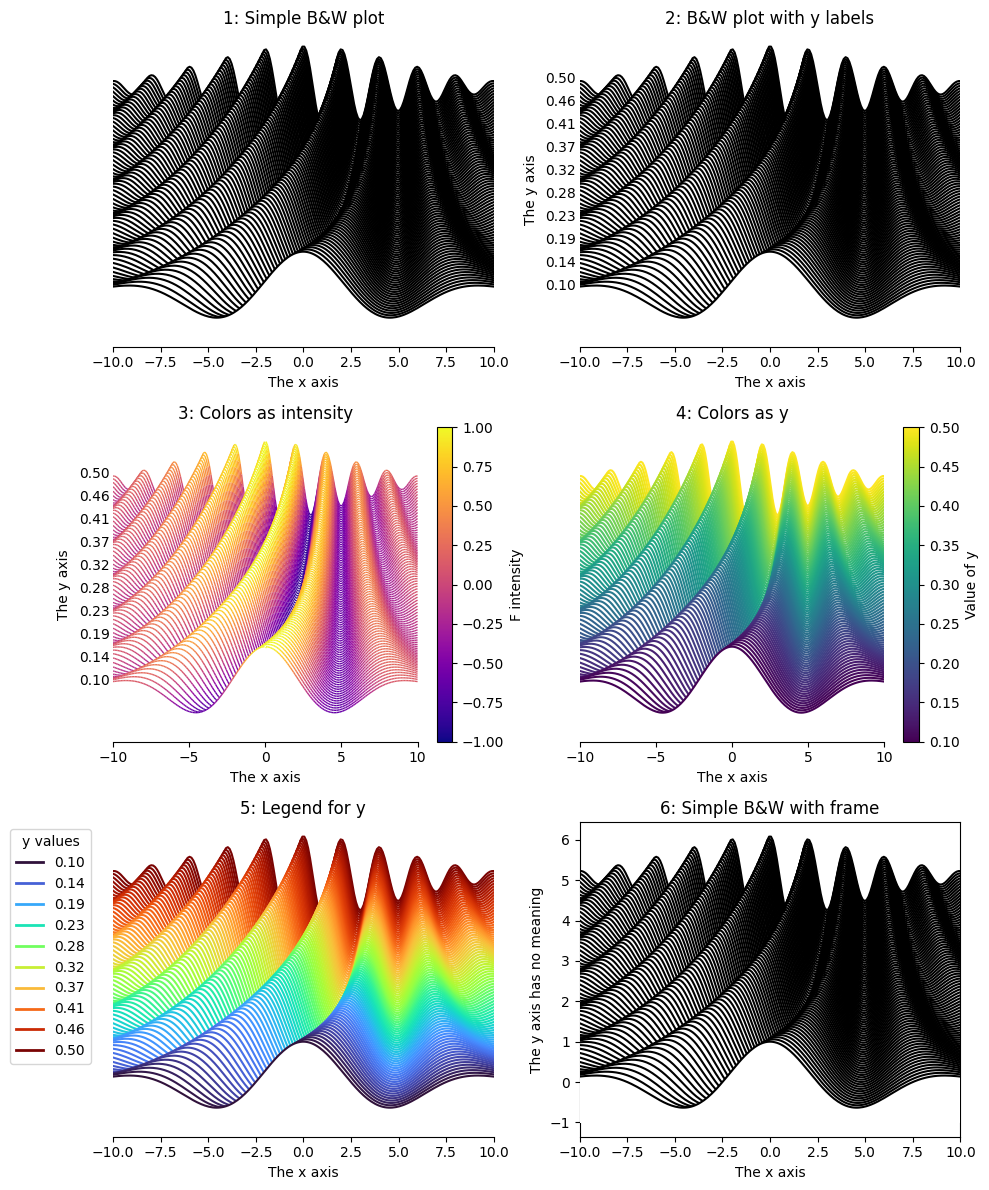

In [3]:
# create the figure
fig = plt.figure(figsize=(10,12))

#####################################################
plt.subplot(321)
plt.title('1: Simple B&W plot')
ax = plt.gca()
# call the waterfall to act on ax
wf.waterfall(x, y, F, ax, shift=0.4, c='black')
# extra config
ax.set_xlabel('The x axis')

#####################################################
plt.subplot(322)
plt.title('2: B&W plot with y labels')
ax = plt.gca()
# call the waterfall to act on ax
wf.waterfall(x, y, F, ax, shift=0.4, c='black')
# add personalized text to the y axis
wf.add_y_text(ax, '{y:.2f}', y[::10], 0.18, 0.84)
# extra config
ax.set_xlabel('The x axis')
ax.set_ylabel('The y axis', labelpad=30) # fix labelpad manually

#####################################################
plt.subplot(323)
plt.title('3: Colors as intensity')
ax = plt.gca()
# call the waterfall to act on ax
cbar = wf.waterfall(x, y, F, ax, shift=0.4, Fmap='plasma', cmin=-1, cmax=1)
wf.add_y_text(ax, '{y:.2f}', y[::10], 0.18, 0.84)
# extra config
ax.set_xlabel('The x axis')
ax.set_ylabel('The y axis', labelpad=30) # fix labelpad manually
plt.colorbar(cbar, ax=ax, label='F intensity')

#####################################################
plt.subplot(324)
plt.title('4: Colors as y')
ax = plt.gca()
# call the waterfall to act on ax
cbar = wf.waterfall(x, y, F, ax, shift=0.4, Ymap='viridis')
# extra config
ax.set_xlabel('The x axis')
plt.colorbar(cbar, ax=ax, label='Value of y')

#####################################################
plt.subplot(325)
plt.title('5: Legend for y')
ax = plt.gca()
# call the waterfall to act on ax
cbar = wf.waterfall(x, y, F, ax, shift=0.4, Ymap='turbo')
wf.add_legends(ax, '{y:.2f}', y[::10], cbar, 'y values', location='left')
# extra config
ax.set_xlabel('The x axis')

#####################################################
plt.subplot(326)
plt.title('6: Simple B&W with frame')
ax = plt.gca()
# call the waterfall to act on ax
cbar = wf.waterfall(x, y, F, ax, shift=0.4, c='black', remove_spines=False)
# extra config
ax.set_xlabel('The x axis')
ax.set_ylabel('The y axis has no meaning')

# finish the plot
plt.tight_layout()
plt.savefig('waterfall.png')
plt.show()